<a href="https://colab.research.google.com/github/imamol555/ANN/blob/master/spell_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

     |████████████████████████████████| 348.9MB 76kB/s 
     |████████████████████████████████| 501kB 52.6MB/s 
     |████████████████████████████████| 3.1MB 41.0MB/s 


In [0]:
import pandas as pd
import numpy as np

In [0]:
data  = pd.read_excel('generated_mdm_mckesson.xlsx')

In [4]:
print(len(data))
data.head()

80483


,product,normalized_product
0,safety vest glowear® 8210hl class 2 2x-large /...,safety vest glowear® 8210hl class 2 2x-large /...
1,sklar® operating scissors 6-1/2 icncch premium...,sklar® operating scissors 6-1/2 inch premium o...
2,lab jacket valumax® extra-saf bueberrysmalllon...,lab jacket valumax® extra-safe™ blueberry smal...
3,wramu-p jackt esteel gray smalll ong sleeves h...,warm-up jacket steel gray small long sleeves h...
4,"warm-up jac™ket evol,utixon™ blue medmiudm lon...",warm-up jacket evolution™ blue medium long sle...


In [0]:
products = data['product'].to_list()
norm_pdcts = data['normalized_product'].to_list()

In [6]:
np.mean([len(pdct) for pdct in products])

len(np.max([pdct.split(' ') for pdct in products]))

13

In [7]:
from numpy.random import shuffle as random_shuffle, seed as random_seed
random_seed(123)

data = list(zip(products, norm_pdcts ))

# shuffle data
random_shuffle(data)

data = [ item for item in data if len(item[0])<99 and len(item[1])<99]

products = [item[0] for item in data]
norm_pdcts = [item[1] for item in data]


print(len(products))
print(len(norm_pdcts))
print(products[0])
print(norm_pdcts[0])

50531
50531
polo shirt 3x-lareg pewet srhort sleeves male
polo shirt 3x-large pewter short sleeves male


Remove Unicode symbols 

In [0]:
products = list(map(lambda pdct : pdct.encode('ascii', 'ignore').decode("utf-8"), products))
norm_pdcts = list(map(lambda pdct : pdct.encode('ascii', 'ignore').decode("utf-8"), norm_pdcts))

In [9]:
for i in range(3):
  print(products[i])
  print(norm_pdcts[i])

polo shirt 3x-lareg pewet srhort sleeves male
polo shirt 3x-large pewter short sleeves male
lab jackeh val(max extr"-safe ligot 8(nk medium long uleeves hip length
lab jacket valumax extra-safe light pink medium long sleeves hip length
arm-up jacket pewtr medium log raglan sleevs hip lengh
warm-up jacket pewter medium long raglan sleeves hip length


In [0]:
text = "".join(products)
chars = list(set(text))

In [11]:
special_chars = ['<PAD>', '<UNK>', '<GO>', '<EOS>']
char_to_ix = { ch:i for i,ch in enumerate( special_chars + sorted(chars)) }
ix_to_char = { i:ch for i,ch in enumerate( special_chars + sorted(chars)) }

print(ix_to_char)


{0: '<PAD>', 1: '<UNK>', 2: '<GO>', 3: '<EOS>', 4: ' ', 5: '"', 6: '%', 7: "'", 8: '(', 9: ')', 10: '*', 11: ',', 12: '-', 13: '.', 14: '/', 15: '0', 16: '1', 17: '2', 18: '3', 19: '4', 20: '5', 21: '6', 22: '7', 23: '8', 24: '9', 25: 'a', 26: 'b', 27: 'c', 28: 'd', 29: 'e', 30: 'f', 31: 'g', 32: 'h', 33: 'i', 34: 'j', 35: 'k', 36: 'l', 37: 'm', 38: 'n', 39: 'o', 40: 'p', 41: 'q', 42: 'r', 43: 's', 44: 't', 45: 'u', 46: 'v', 47: 'w', 48: 'x', 49: 'y', 50: 'z'}


In [12]:
len(char_to_ix)

51

In [0]:
source_ids = [[2] + [char_to_ix.get(letter, char_to_ix['<UNK>']) for letter in line] + [3] for line in products]
#target_ids = [[char_to_ix.get(letter, char_to_ix['<UNK>']) for letter in line] + [char_to_ix['<EOS>'] for line in norm_pdcts]



In [14]:
char_to_ix['<EOS>']

3

In [0]:
target_ids = [ [2] + [char_to_ix.get(letter, char_to_ix['<UNK>']) for letter in line] + [3] for line in norm_pdcts]

In [16]:
print(products[:3])
print(source_ids[:3])

['polo shirt 3x-lareg pewet srhort sleeves male', 'lab jackeh val(max extr"-safe ligot 8(nk medium long uleeves hip length', 'arm-up jacket pewtr medium log raglan sleevs hip lengh']
[[2, 40, 39, 36, 39, 4, 43, 32, 33, 42, 44, 4, 18, 48, 12, 36, 25, 42, 29, 31, 4, 40, 29, 47, 29, 44, 4, 43, 42, 32, 39, 42, 44, 4, 43, 36, 29, 29, 46, 29, 43, 4, 37, 25, 36, 29, 3], [2, 36, 25, 26, 4, 34, 25, 27, 35, 29, 32, 4, 46, 25, 36, 8, 37, 25, 48, 4, 29, 48, 44, 42, 5, 12, 43, 25, 30, 29, 4, 36, 33, 31, 39, 44, 4, 23, 8, 38, 35, 4, 37, 29, 28, 33, 45, 37, 4, 36, 39, 38, 31, 4, 45, 36, 29, 29, 46, 29, 43, 4, 32, 33, 40, 4, 36, 29, 38, 31, 44, 32, 3], [2, 25, 42, 37, 12, 45, 40, 4, 34, 25, 27, 35, 29, 44, 4, 40, 29, 47, 44, 42, 4, 37, 29, 28, 33, 45, 37, 4, 36, 39, 31, 4, 42, 25, 31, 36, 25, 38, 4, 43, 36, 29, 29, 46, 43, 4, 32, 33, 40, 4, 36, 29, 38, 31, 32, 3]]


In [17]:
print('max :' , len(max(source_ids, key=len)))
print('min :' , len(min(source_ids, key=len)))

print('max :' , len(max(target_ids, key=len)))
print('min :' , len(min(target_ids, key=len)))

max : 100
min : 16
max : 100
min : 17


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

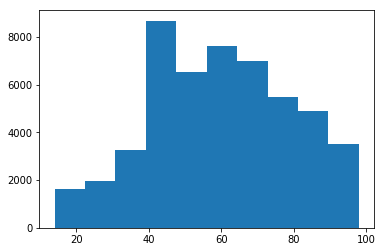

In [19]:
lengths = [len(pdct) for pdct in products]

plt.hist(lengths)
plt.show()

In [0]:
padded_source = [ pdct + [0]*(100 - len(pdct)) for pdct in source_ids]
padded_target = [ pdct + [0]*(100 - len(pdct)) for pdct in target_ids]

In [21]:
X = np.array([np.array(pdct).reshape(100,1) for pdct in padded_source])
X.shape

(50531, 100, 1)

In [0]:
y = np.array([np.array(pdct).reshape(100,1) for pdct in padded_target])

In [0]:
X = np.squeeze(X)
y = np.squeeze(y)

In [24]:
X[:3]

array([[ 2, 40, 39, 36, 39,  4, 43, 32, 33, 42, 44,  4, 18, 48, 12, 36,
        25, 42, 29, 31,  4, 40, 29, 47, 29, 44,  4, 43, 42, 32, 39, 42,
        44,  4, 43, 36, 29, 29, 46, 29, 43,  4, 37, 25, 36, 29,  3,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 2, 36, 25, 26,  4, 34, 25, 27, 35, 29, 32,  4, 46, 25, 36,  8,
        37, 25, 48,  4, 29, 48, 44, 42,  5, 12, 43, 25, 30, 29,  4, 36,
        33, 31, 39, 44,  4, 23,  8, 38, 35,  4, 37, 29, 28, 33, 45, 37,
         4, 36, 39, 38, 31,  4, 45, 36, 29, 29, 46, 29, 43,  4, 32, 33,
        40,  4, 36, 29, 38, 31, 44, 32,  3,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 2, 25, 42, 37, 12, 45, 40,  4, 34, 25, 27, 35, 29, 44,  4, 40,
        29, 47

In [25]:
y[:3]

array([[ 2, 40, 39, 36, 39,  4, 43, 32, 33, 42, 44,  4, 18, 48, 12, 36,
        25, 42, 31, 29,  4, 40, 29, 47, 44, 29, 42,  4, 43, 32, 39, 42,
        44,  4, 43, 36, 29, 29, 46, 29, 43,  4, 37, 25, 36, 29,  3,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 2, 36, 25, 26,  4, 34, 25, 27, 35, 29, 44,  4, 46, 25, 36, 45,
        37, 25, 48,  4, 29, 48, 44, 42, 25, 12, 43, 25, 30, 29,  4, 36,
        33, 31, 32, 44,  4, 40, 33, 38, 35,  4, 37, 29, 28, 33, 45, 37,
         4, 36, 39, 38, 31,  4, 43, 36, 29, 29, 46, 29, 43,  4, 32, 33,
        40,  4, 36, 29, 38, 31, 44, 32,  3,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 2, 47, 25, 42, 37, 12, 45, 40,  4, 34, 25, 27, 35, 29, 44,  4,
        40, 29

In [0]:
X = X[:500]
y = y[:500]

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [0]:
BATCH_SIZE = 64
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [29]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 100]), TensorShape([64, 100]))

#Encoder

In [0]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [0]:
embedding_dim = 128
vocab_inp_size = len(char_to_ix)
vocab_tar_size = len(char_to_ix)
units = 32

encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

In [32]:
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 100, 32)
Encoder Hidden state shape: (batch size, units) (64, 32)


In [33]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  6528      
_________________________________________________________________
gru (GRU)                    multiple                  15552     
Total params: 22,080
Trainable params: 22,080
Non-trainable params: 0
_________________________________________________________________


#Attention

In [0]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [0]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

In [36]:
print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 32)
Attention weights shape: (batch_size, sequence_length, 1) (64, 100, 1)


In [37]:
attention_layer.summary()

Model: "bahdanau_attention"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  330       
_________________________________________________________________
dense_1 (Dense)              multiple                  330       
_________________________________________________________________
dense_2 (Dense)              multiple                  11        
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


#Decoder

In [0]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [0]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

In [40]:
sample_decoder_output, _, _ = decoder(tf.random.uniform((64, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 51)


In [41]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  6528      
_________________________________________________________________
gru_1 (GRU)                  multiple                  18624     
_________________________________________________________________
dense_3 (Dense)              multiple                  1683      
_________________________________________________________________
bahdanau_attention_1 (Bahdan multiple                  2145      
Total params: 28,980
Trainable params: 28,980
Non-trainable params: 0
_________________________________________________________________


##Optimizer and Loss

In [0]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

##Checkpoints

In [0]:
import os
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

#Training

In [0]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([char_to_ix['<GO>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [45]:
steps_per_epoch = len(padded_source[:500])//BATCH_SIZE
steps_per_epoch

7

In [0]:
import io
import time

In [56]:
EPOCHS = 100

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss


  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Loss 0.7203
Time taken for 1 epoch 1.6355745792388916 sec

Epoch 2 Loss 0.9393
Time taken for 1 epoch 1.5537619590759277 sec

Epoch 3 Loss 1.1125
Time taken for 1 epoch 1.5140221118927002 sec

Epoch 4 Loss 1.0261
Time taken for 1 epoch 1.5331730842590332 sec

Epoch 5 Loss 0.9688
Time taken for 1 epoch 1.5161371231079102 sec

Epoch 6 Loss 0.9229
Time taken for 1 epoch 1.5145063400268555 sec

Epoch 7 Loss 0.8951
Time taken for 1 epoch 1.4942119121551514 sec

Epoch 8 Loss 0.8699
Time taken for 1 epoch 1.5013983249664307 sec

Epoch 9 Loss 0.8493
Time taken for 1 epoch 1.5240273475646973 sec

Epoch 10 Loss 0.8377
Time taken for 1 epoch 1.5023283958435059 sec

Epoch 11 Loss 0.8272
Time taken for 1 epoch 1.4815220832824707 sec

Epoch 12 Loss 0.8170
Time taken for 1 epoch 1.4996984004974365 sec

Epoch 13 Loss 0.8057
Time taken for 1 epoch 1.4945669174194336 sec

Epoch 14 Loss 0.7985
Time taken for 1 epoch 1.5185565948486328 sec

Epoch 15 Loss 0.7926
Time taken for 1 epoch 1.47423744201

In [0]:
max_length_targ = max_length_inp = 100

In [50]:
def preprocess_sentence(sentence):
  sentence = sentence.encode('ascii', 'ignore').decode("utf-8")
  sent_ids = [2]  + [char_to_ix.get(letter, char_to_ix['<UNK>']) for letter in sentence] + [3] 
  padded_sentence = sent_ids + [0]*(100 - len(sent_ids))
  inputs = tf.convert_to_tensor(padded_sentence)
  print(inputs.shape)
  inputs = tf.expand_dims(inputs, 0)
  print(inputs.shape)
  return inputs


preprocess_sentence('polo shirt mediu mblac kshrot sleeves female')

(100,)
(1, 100)


<tf.Tensor: id=245496, shape=(1, 100), dtype=int32, numpy=
array([[ 2, 40, 39, 36, 39,  4, 43, 32, 33, 42, 44,  4, 37, 29, 28, 33,
        45,  4, 37, 26, 36, 25, 27,  4, 35, 43, 32, 42, 39, 44,  4, 43,
        36, 29, 29, 46, 29, 43,  4, 30, 29, 37, 25, 36, 29,  3,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]], dtype=int32)>

In [0]:
def evaluate(sentence):

    inputs = preprocess_sentence(sentence)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([char_to_ix['<GO>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

      
        predicted_id = tf.argmax(predictions[0]).numpy()

        result += ix_to_char[predicted_id] + ' '

        if ix_to_char[predicted_id] == '<EOS>':
            return result, sentence

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence

In [0]:
def spell_check(sentence):
    result, sentence = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))


#Restore Checkpoint and spell check

In [57]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [60]:
spell_check('warm-up jaecket evoluttion™ blueh large l5ong sleeves hip (len1gth')

(100,)
(1, 100)
Input: warm-up jaecket evoluttion™ blueh large l5ong sleeves hip (len1gth
Predicted translation: w a r m - u p   j a c k e t   b l u e   l o n g   s l e e v e s   h i p   l e n g t h <EOS> 


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -a /content/training_checkpoints '/content/drive/My Drive/programs/latest'